In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sustainify_20.09.24/merged_daily_new_lab.csv')

In [ ]:
df.head()

,Price,date
0,47.803208,2010-07-21
1,58.061250,2010-07-22
2,46.146042,2010-07-23
3,43.593292,2010-07-24
4,19.148125,2010-07-25


In [ ]:
df.isnull().sum()

,0
Price,0
date,0


In [ ]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,Price
date,
2010-07-21,47.803208
2010-07-22,58.061250
2010-07-23,46.146042
2010-07-24,43.593292
2010-07-25,19.148125


<Axes: xlabel='date'>

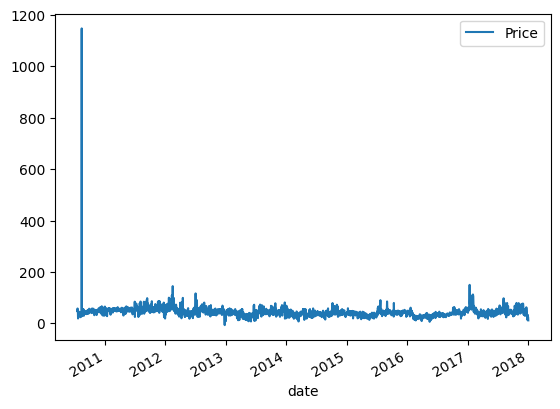

In [ ]:
df.plot()

<Axes: xlabel='date'>

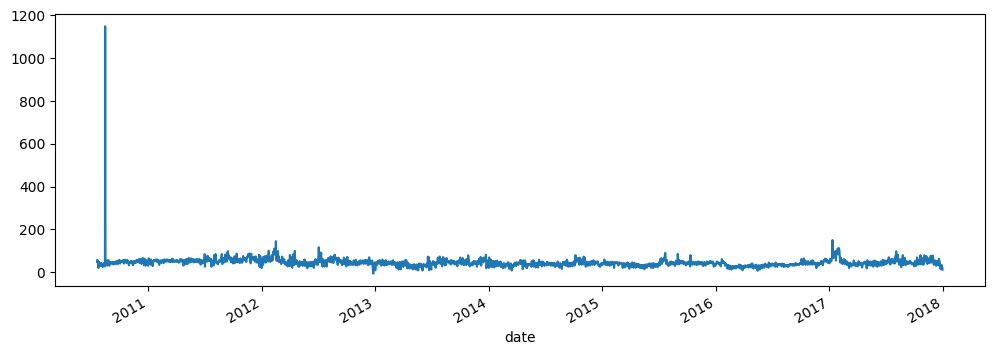

In [ ]:
df['Price'].plot(figsize=(12,4))

<Axes: xlabel='date'>

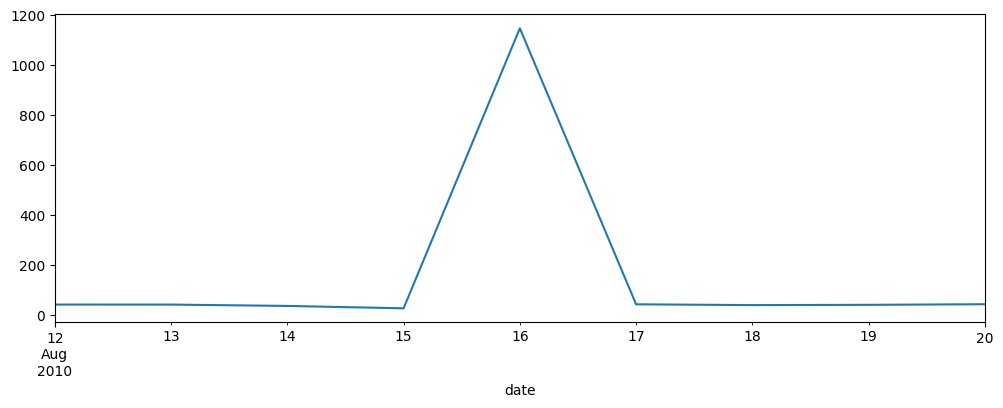

In [ ]:
df_filtered = df[(df.index >= '2010-08-12') & (df.index <= '2010-08-20')]
df_filtered['Price'].plot(figsize=(12,4))

In [ ]:
negative_values_count = (df['Price'] < 0).sum()
print(negative_values_count)
negative_values = df[df['Price'] < 0]
print(negative_values)

2
               Price
date                
2012-12-25 -5.256250
2012-12-26 -6.710417


In [ ]:
df = df.drop(['2010-08-16','2012-12-25','2012-12-26'])

<Axes: xlabel='date'>

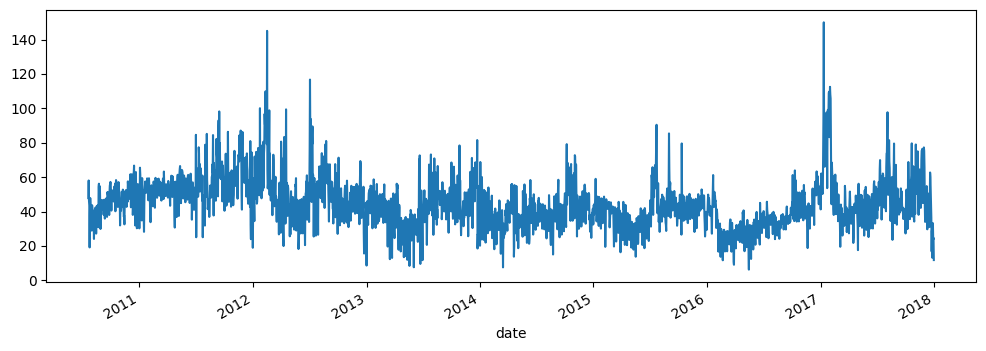

In [ ]:
df['Price'].plot(figsize=(12,4))

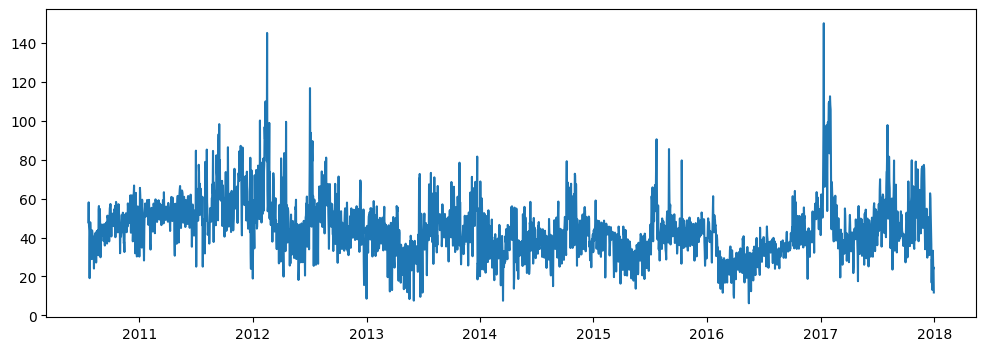

In [ ]:
figure,axis = plt.subplots(figsize=(12,4))
axis.plot(df.index,df)

In [ ]:
df.describe()

,Price
count,2717.000000
mean,45.334395
std,14.124088
min,6.245417
25%,36.178333
50%,44.287500
75%,52.512083
max,150.016667


In [ ]:
from datetime import datetime
date = datetime(2021,11,21)
print(date.date())
print(date.day)
print(date.weekday())

2021-11-21
21
6


In [ ]:
# Time Resmapling
df.resample(rule='MS').min()

,Price
date,
2010-07-01,19.148125
2010-08-01,24.082625
2010-09-01,35.900167
2010-10-01,31.948760
2010-11-01,32.561208
...,...
2017-08-01,23.548333
2017-09-01,32.357083
2017-10-01,27.268750


<ipython-input-17-3658aa091e9b>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule='A').min().plot(kind='bar')


<Axes: xlabel='date'>

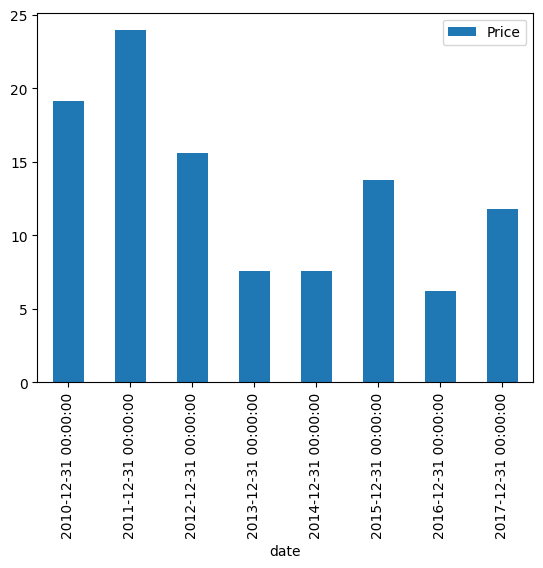

In [ ]:
df.resample(rule='A').min().plot(kind='bar')

<ipython-input-18-b6c8c69268b6>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule='A').max().plot(kind='bar')


<Axes: xlabel='date'>

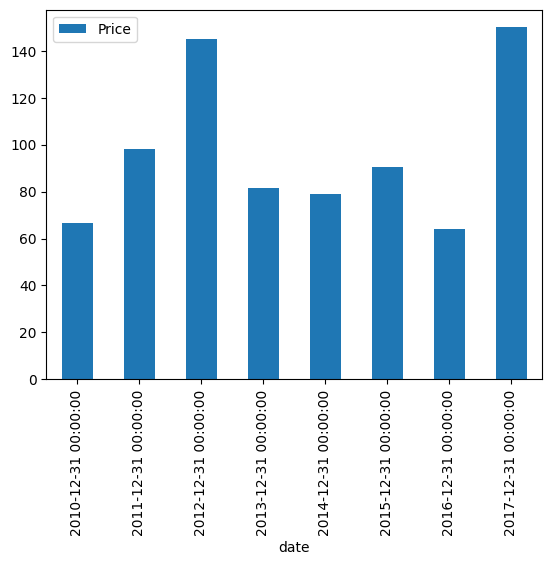

In [ ]:
df.resample(rule='A').max().plot(kind='bar')

<ipython-input-19-962228e9d2c4>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule='A').max().plot()


<Axes: xlabel='date'>

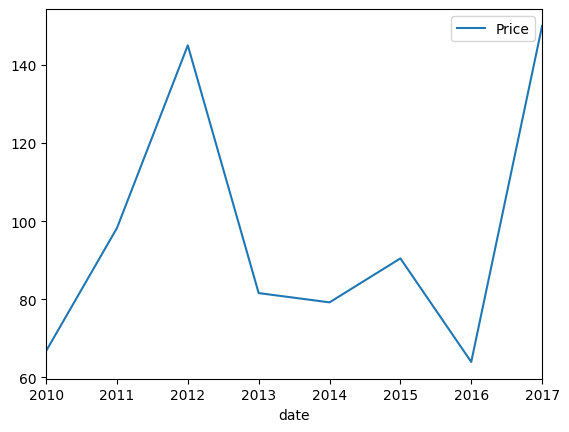

In [ ]:
df.resample(rule='A').max().plot()

<ipython-input-20-75936b5b872e>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample(rule='A').mean().plot(kind='bar')


<Axes: xlabel='date'>

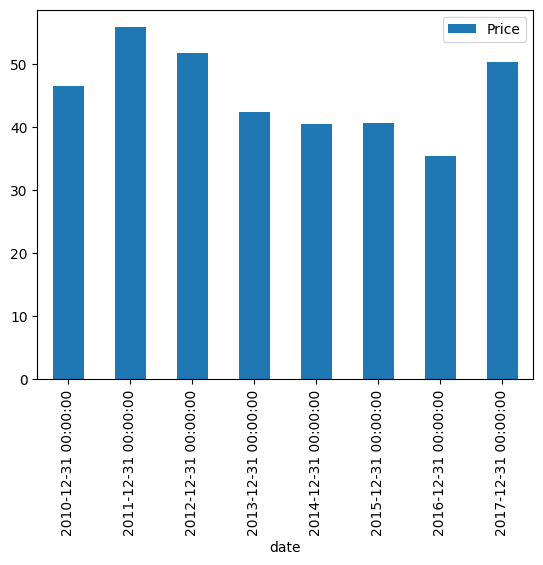

In [ ]:
df.resample(rule='A').mean().plot(kind='bar')

<ipython-input-21-d05c853563f7>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample(rule='M').max().plot(kind='bar',figsize=(12,4))


<Axes: xlabel='date'>

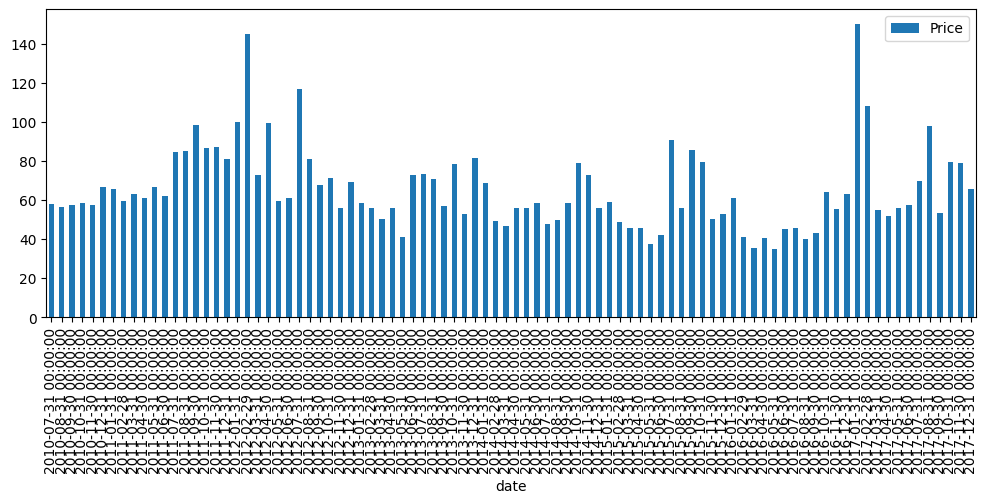

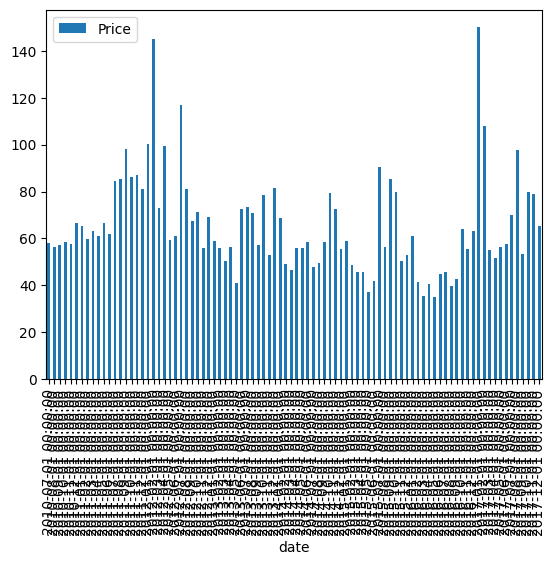

In [ ]:
df.resample(rule='M').max().plot(kind='bar',figsize=(12,4))
df.resample(rule='MS').max().plot(kind='bar')

In [ ]:
# Rolling
df.rolling(10).mean().head(20) # rolling takes 10 values and .min() calculating mean of those 10 values

,Price
date,
2010-07-21,NaN
2010-07-22,NaN
2010-07-23,NaN
2010-07-24,NaN
2010-07-25,NaN
2010-07-26,NaN
2010-07-27,NaN
2010-07-28,NaN
2010-07-29,NaN


In [ ]:
df_roll = df.copy()  # Create a copy of the DataFrame

# Calculate rolling mean for the 'price' column
df_roll['Roll_Price'] = df_roll['Price'].rolling(window=10,min_periods=4).mean()

df_roll[0:20]

,Price,Roll_Price
date,,
2010-07-21,47.803208,NaN
2010-07-22,58.061250,NaN
2010-07-23,46.146042,NaN
2010-07-24,43.593292,48.900948
2010-07-25,19.148125,42.950383
2010-07-26,38.118250,42.145028
2010-07-27,47.853458,42.960518
2010-07-28,43.732667,43.057036
2010-07-29,43.872417,43.147634


<Axes: xlabel='date'>

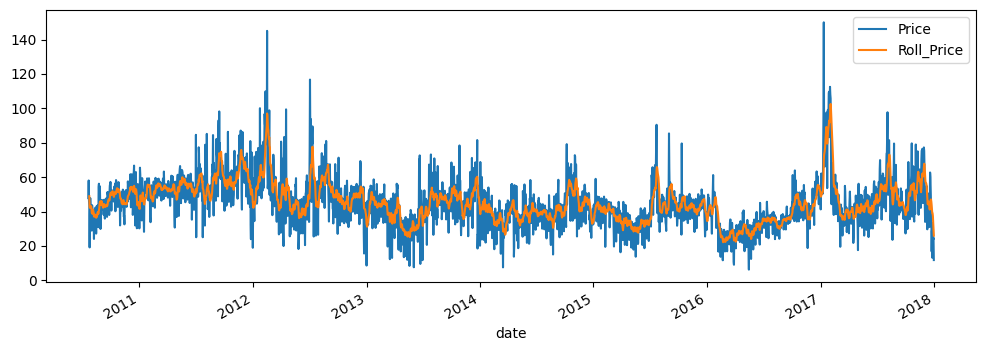

In [ ]:
df_roll[['Price','Roll_Price']].plot(figsize=(12,4))

<Axes: xlabel='date'>

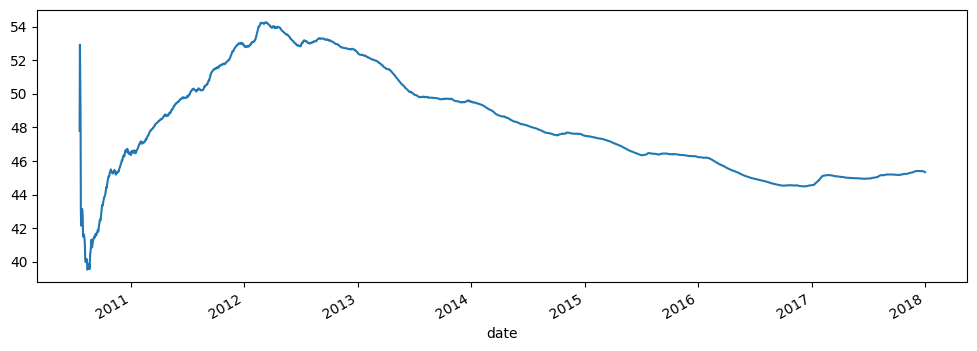

In [ ]:
df_exp = df.copy()
df_exp['Price'].expanding().mean().plot(figsize=(12,4))

In [ ]:
df['Price'].idxmax()

Timestamp('2017-01-11 00:00:00')

Day#2

1.1 EMA and EWMA

In [ ]:
# Calculate Exponential Moving Average (EMA) with a specified span
# Let's say we want a 3-month EMA
df['EMA'] = df['Price'].ewm(span=3, adjust=False).mean()

# Calculate Exponentially Weighted Moving Average (EWMA)
# Here, let's use a decay factor (lambda) of 0.2
df['EWMA'] = df['Price'].ewm(alpha=0.2, adjust=False).mean()

# Display the DataFrame with the calculated EMA and EWMA
print(df[['Price', 'EMA', 'EWMA']].head(10))

                Price        EMA       EWMA
date                                       
2010-07-21  47.803208  47.803208  47.803208
2010-07-22  58.061250  52.932229  49.854817
2010-07-23  46.146042  49.539135  49.113062
2010-07-24  43.593292  46.566214  48.009108
2010-07-25  19.148125  32.857169  42.236911
2010-07-26  38.118250  35.487710  41.413179
2010-07-27  47.853458  41.670584  42.701235
2010-07-28  43.732667  42.701625  42.907521
2010-07-29  43.872417  43.287021  43.100500
2010-07-30  42.241417  42.764219  42.928684


<Axes: xlabel='date'>

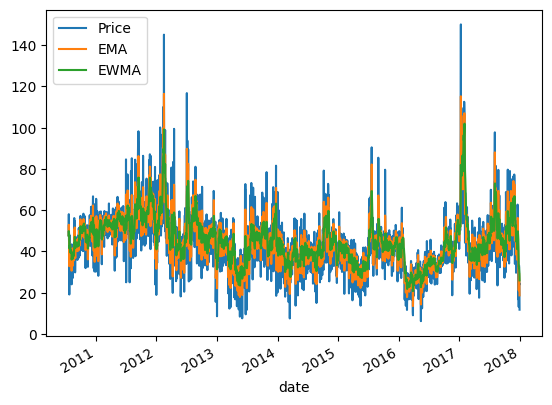

In [ ]:
df[['Price', 'EMA', 'EWMA']].plot()

1.2 Seasonal Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = df.asfreq('D')  # Set frequency to monthly
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Price,0
EMA,0
EWMA,0


In [ ]:
df

,Price,EMA,EWMA
date,,,
2010-07-21,47.803208,47.803208,47.803208
2010-07-22,58.061250,52.932229,49.854817
2010-07-23,46.146042,49.539135,49.113062
2010-07-24,43.593292,46.566214,48.009108
2010-07-25,19.148125,32.857169,42.236911
...,...,...,...
2017-12-27,30.209583,25.685323,32.282477
2017-12-28,33.220417,29.452870,32.470065
2017-12-29,23.760000,26.606435,30.728052


<Figure size 1200x400 with 0 Axes>

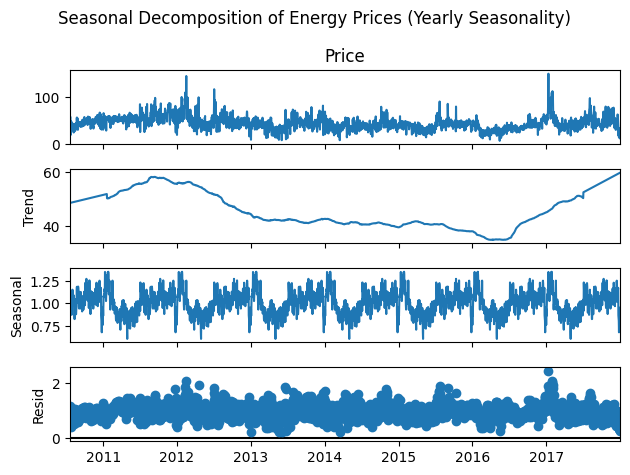

In [ ]:
result_1 = seasonal_decompose(df['Price'], model='multiplicative', extrapolate_trend='freq', period=365)
plt.figure(figsize=(12, 4))

# Plot the decomposition result
result_1.plot()
plt.suptitle('Seasonal Decomposition of Energy Prices (Yearly Seasonality)')
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x400 with 0 Axes>

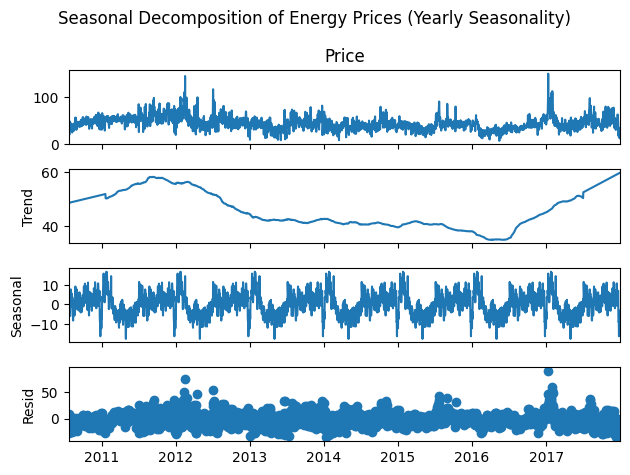

In [ ]:
result_2 = seasonal_decompose(df['Price'], model='additive', extrapolate_trend='freq', period=365
                          )
plt.figure(figsize=(12, 4))

# Plot the decomposition result
result_2.plot()
plt.suptitle('Seasonal Decomposition of Energy Prices (Yearly Seasonality)')
plt.tight_layout()

# Show the plot
plt.show()

1.3 Removing Seasonality

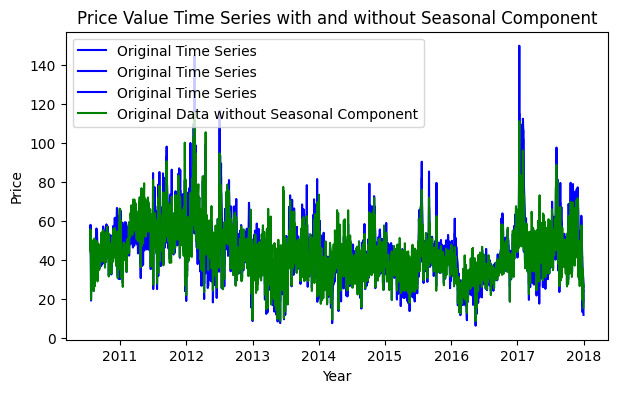

In [ ]:
# Plotting the original data and original data without the seasonal component
plt.figure(figsize=(7, 4))
# Plot the original time series data
plt.plot(df, label='Original Time Series', color='blue')
data_without_seasonal = df['Price'] / result_1.seasonal
# Plot the original data without the seasonal component
plt.plot(data_without_seasonal, label='Original Data without Seasonal Component', color='green')
plt.title('Price Value Time Series with and without Seasonal Component')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

2 MA models

2.1 Dickey Fuller Test

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2717 entries, 2010-07-21 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2717 non-null   float64
 1   EMA     2717 non-null   float64
 2   EWMA    2717 non-null   float64
dtypes: float64(3)
memory usage: 84.9 KB


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df['Price'])

ADF Statistics: -5.010589600879508
p- value: 2.1146726699567977e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df['Price_at_365 diff'] = df['Price'] - df['Price'].shift(365)

In [ ]:
adf_test(df['Price_at_365 diff'].dropna())

ADF Statistics: -4.201293275196178
p- value: 0.0006555866901146075
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


2.2 PACF, ACF

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

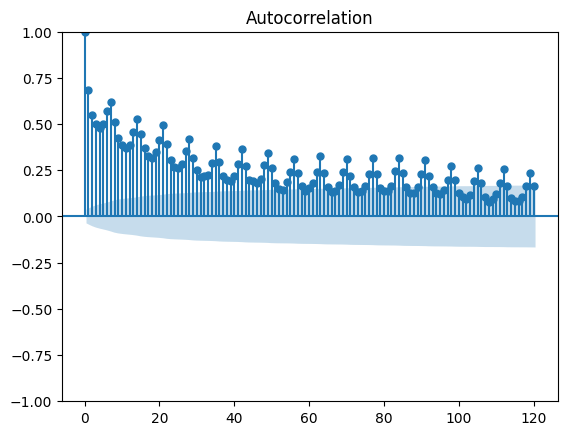

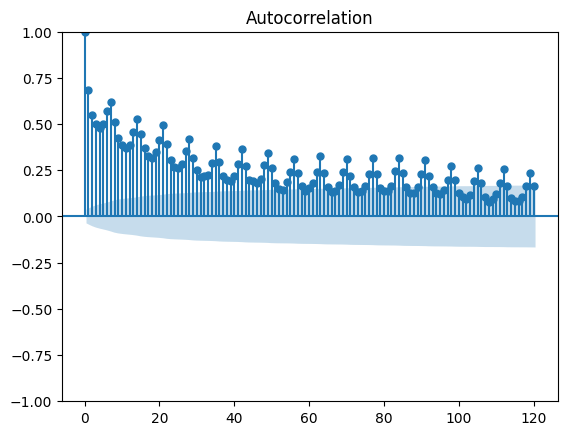

In [ ]:
plot_acf(df['Price'],lags=120)

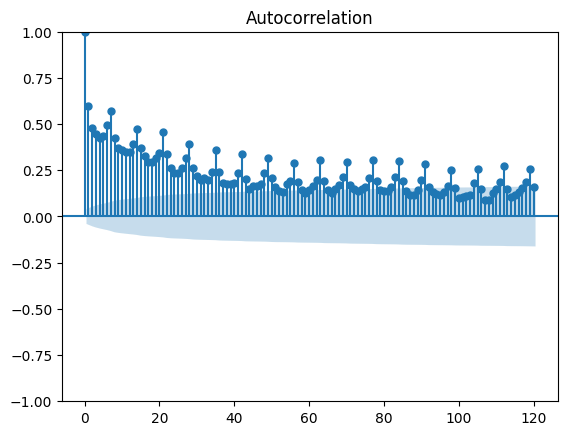

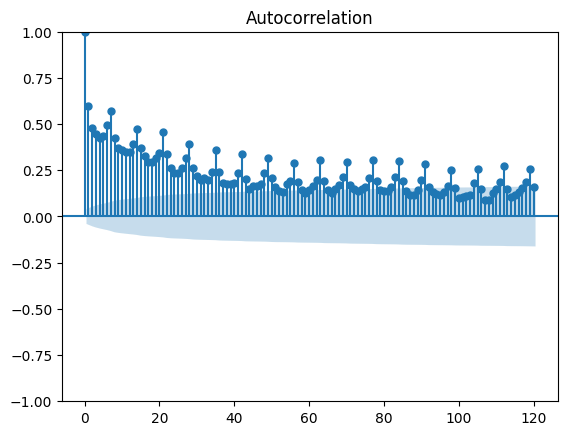

In [ ]:
plot_acf(df['Price_at_365 diff'].dropna(),lags=120)

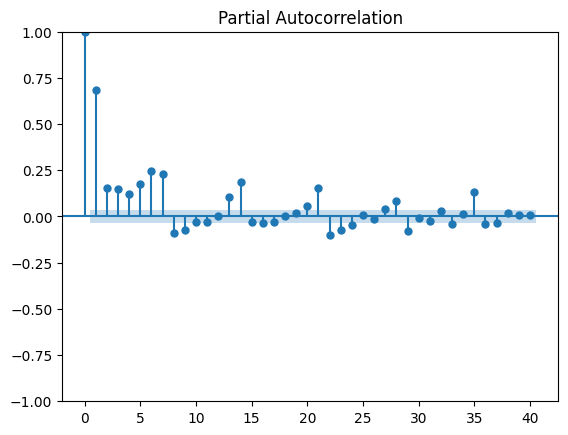

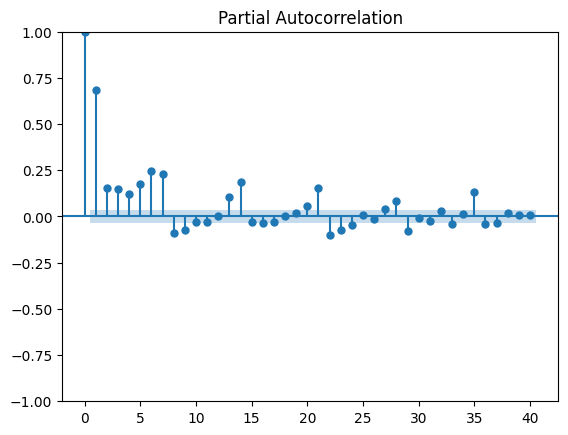

In [ ]:
plot_pacf(df['Price'],lags=40)

2.3 ARIMA

In [ ]:
df

,Price,EMA,EWMA,Price_at_365 diff
date,,,,
2010-07-21,47.803208,47.803208,47.803208,NaN
2010-07-22,58.061250,52.932229,49.854817,NaN
2010-07-23,46.146042,49.539135,49.113062,NaN
2010-07-24,43.593292,46.566214,48.009108,NaN
2010-07-25,19.148125,32.857169,42.236911,NaN
...,...,...,...,...
2017-12-27,30.209583,25.685323,32.282477,-24.402917
2017-12-28,33.220417,29.452870,32.470065,-12.539583
2017-12-29,23.760000,26.606435,30.728052,-26.140000


In [ ]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2016,7,21)
test_dataset_end=datetime(2017,12,31)

In [ ]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model_ARIMA=ARIMA(train_data['Price'],order=(2,0,7))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_Arima_fit=model_ARIMA.fit()

In [ ]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2189
Model:                 ARIMA(2, 0, 7)   Log Likelihood               -8015.582
Date:                Tue, 08 Oct 2024   AIC                          16053.165
Time:                        11:05:45   BIC                          16115.768
Sample:                             0   HQIC                         16076.046
                               - 2189                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.8391      1.539     29.135      0.000      41.823      47.856
ar.L1          0.4417      0.106      4.178      0.000       0.234       0.649
ar.L2          0.4643      0.104      4.465      0.000       0.260       0.668
ma.L1         -0.0208      0.105     -0.198      0.843      -0.226       0.185
ma.L2         -0.3936      0.060     -6.611      0.000      -0.510      -0.277
ma.L3         -0.1012      0.024     -4.277      0.000      -0.148      -0.055
ma.L4         -0.0854      0.021     -4.066      0.000      -0.127      -0.044
ma.L5         -0.0265      0.021     -1.280      0.201      -0.067       0.014
ma.L6          0.0984      0.018      5.431      0.000       0.063       0.134
ma.L7          0.1774      0.019      9.512      0.000       0.141       0.214
sigma2        88.6826      1.624     54.609      0.000      85.500      91.865
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):              1732.89
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.45   Skew:                             0.50
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
test_data

,Price,EMA,EWMA,Price_at_365 diff
date,,,,
2016-07-22,33.984167,34.948545,34.707357,-56.467083
2016-07-23,36.103750,35.526148,34.986636,-34.258333
2016-07-24,32.270833,33.898491,34.443475,-12.741667
2016-07-25,38.144583,36.021537,35.183697,-0.857500
2016-07-26,37.740417,36.880977,35.695041,-5.363750
...,...,...,...,...
2017-12-27,30.209583,25.685323,32.282477,-24.402917
2017-12-28,33.220417,29.452870,32.470065,-12.539583
2017-12-29,23.760000,26.606435,30.728052,-26.140000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2189 entries, 2010-07-21 to 2016-07-21
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              2189 non-null   float64
 1   EMA                2189 non-null   float64
 2   EWMA               2189 non-null   float64
 3   Price_at_365 diff  1824 non-null   float64
dtypes: float64(4)
memory usage: 85.5 KB


In [ ]:
##prediction
pred_start_date = pd.to_datetime(test_data.index[0])
pred_end_date = pd.to_datetime(test_data.index[-1])
print(pred_start_date)
print(pred_end_date)

2016-07-22 00:00:00
2017-12-31 00:00:00


In [ ]:
print(f"Training data range: {train_data.index.min()} to {train_data.index.max()}")
print(f"Prediction range: {pred_start_date} to {pred_end_date}")

Training data range: 2010-07-21 00:00:00 to 2016-07-21 00:00:00
Prediction range: 2016-07-22 00:00:00 to 2017-12-31 00:00:00


In [ ]:
# Get the number of steps (days) to forecast based on the length of test data
n_steps = len(test_data)

# Forecast n_steps ahead (out-of-sample)
pred = model_Arima_fit.predict(start=len(train_data), end=len(train_data) + n_steps - 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
# Align the forecast with test data dates
pred.index = test_data.index  # Align predicted values with test data index

# Now you can compare the forecasted values with your actual test data
print(pred)

date
2016-07-22    36.780136
2016-07-23    36.279251
2016-07-24    35.812554
2016-07-25    36.771409
2016-07-26    36.713283
                ...    
2017-12-27    44.839087
2017-12-28    44.839087
2017-12-29    44.839087
2017-12-30    44.839087
2017-12-31    44.839087
Name: predicted_mean, Length: 528, dtype: float64


In [ ]:
residuals=test_data['Price']-pred
residuals

,0
date,
2016-07-22,-2.795970
2016-07-23,-0.175501
2016-07-24,-3.541721
2016-07-25,1.373174
2016-07-26,1.027133
...,...
2017-12-27,-14.629503
2017-12-28,-11.618670
2017-12-29,-21.079087


<Axes: xlabel='date'>

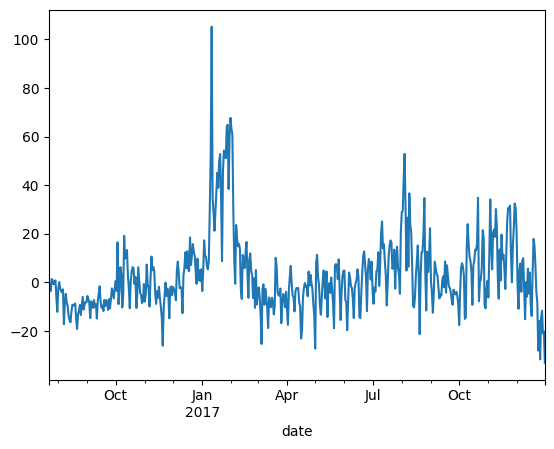

In [ ]:
residuals.plot()

<Axes: ylabel='Density'>

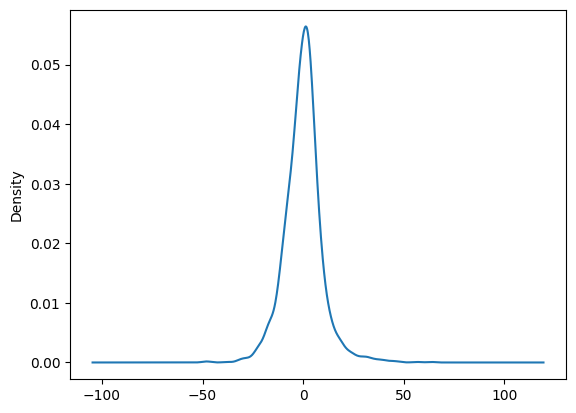

In [ ]:
model_Arima_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA']=pred

<ipython-input-63-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='date'>

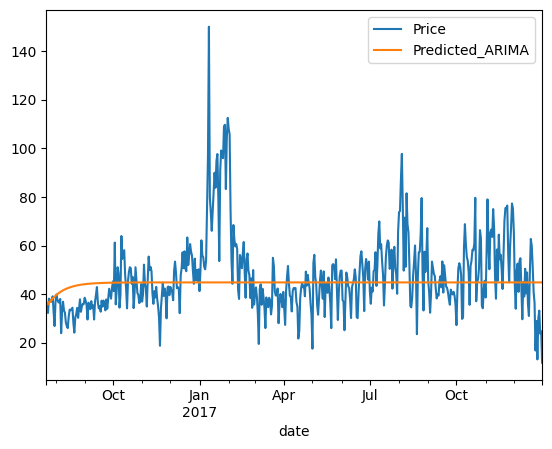

In [ ]:
test_data[['Price','Predicted_ARIMA']].plot()